In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# create comp_obs_model method
# obs_path : the location of observation data folder
# station_id : the USGS station id
# start_time, end_time : setting the time period
# model_output_bf_cal_path : the filepath of before calibration output
# model_output_af_cal_path : the filepath of after calibration output
def comp_obs_model(obs_path, station_id, start_time, end_time, model_output_bf_cal_path, model_output_af_cal_path):
    # set the specific station observation data filepath
    obs_filename = "Gage_height.ft@" + station_id + ".EntireRecord.csv"
    # read observation csv file using pandas
    obs_filename_station = pd.read_csv(obs_path+obs_filename, low_memory=False, skiprows=14) 
    # get data from "ISO 8601 UTC" column in obs_filename_station dataframe
    total_date_index = obs_filename_station['ISO 8601 UTC']
    # create new dataframe object using water level data and date index
    obs_stream_depth = pd.DataFrame(obs_filename_station['Water Level (m)'].values, index=total_date_index.values)
    # filter the data between the start_time and end_time 
    obs_filt = obs_stream_depth.loc[start_time[0:10]+"T"+start_time[11:18]+":00Z":end_time[0:10]+"T"+end_time[11:18]+":00Z"]
    # create index_filt dataframe object from start time as same length of obs_filt data with 15min frequency
    index_filt = pd.date_range(start_time, periods=len(obs_filt), freq='15min')
    # create new dataframe object between start_time and end_time
    obs_stream_depth_filt = pd.DataFrame(obs_filt.values, index=index_filt.values)
    
    # read before calibration model output csv file using pandas
    total_model_bf_cal = pd.read_csv(model_output_bf_cal_path, low_memory=False, usecols=range(1,20),header=1)
    # create index_dataframe object from start time as same length of total_model_bf_cal data with 5min frequency
    index = pd.date_range(start=start_time, periods=len(total_model_bf_cal), freq='5min')
    # create new dataframe object using total_model_bf_cal data and date index
    model_output_bf_cal_station = pd.DataFrame(total_model_bf_cal[station_id].values, index=index.values)
    # filter the data between the start_time and end_time 
    model_filt = model_output_bf_cal_station.loc[start_time:end_time]
    # create final dataframe object using model_filt.values and model_filt.index
    model_output_bf_cal_filt = pd.DataFrame(model_filt.values, index=model_filt.index)
    
    # read after calibration model output csv file using pandas
    total_model_af_cal = pd.read_csv(model_output_af_cal_path, low_memory=False, usecols=range(1,20),header=1)
    # create index_dataframe object from start time as same length of total_model_af_cal data with 5min frequency
    index = pd.date_range(start=start_time, periods=len(total_model_af_cal), freq='5min')
    # create new dataframe object using total_model_af_cal data and date index
    model_output_af_cal_station = pd.DataFrame(total_model_af_cal[station_id[1:9]].values, index=index.values)
    # filter the data between the start_time and end_time 
    model_filt = model_output_af_cal_station.loc[start_time:end_time]
    # create final dataframe object using model_filt.values and model_filt.index
    model_output_af_cal_filt = pd.DataFrame(model_filt.values, index=model_filt.index)

    # create the plot figure 
    plt.figure(figsize=(15,5))
    # get the current axis of the plot
    ax = plt.gca()
    # plot and set label, marker, and markersize
    ax.plot(model_output_bf_cal_filt, label='Model Output(before calibration)', marker="*", markersize=3)
    ax.plot(model_output_af_cal_filt, label='Model Output(after calibration)', marker="^", markersize=3)
    ax.plot(obs_stream_depth_filt, label='Observation(station id = %s)' %station_id, marker="+", markersize=3)
    ax.grid(True)
    # set the y-axis labels
    ax.set_ylabel('Water Elevation(m)', fontsize=15)
    # setting legend, xticks and yticks fontsizes
    plt.legend(fontsize=12)
    plt.xticks(rotation=90, fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

In [11]:
obs_path = "./Data adjusted to the vertical datum/"
station_id = "02045500"
start_time = '2016-10-07 00:00'
end_time = '2016-10-24 00:00'
model_output_af_cal_path = "VU_30m_HPC_GPU_Nicole_2016_gauges_035_baseflow_PO.csv"
model_output_bf_cal_path = "VU_30m_HPC_GPU_Nicole_2016_010_PO.csv"

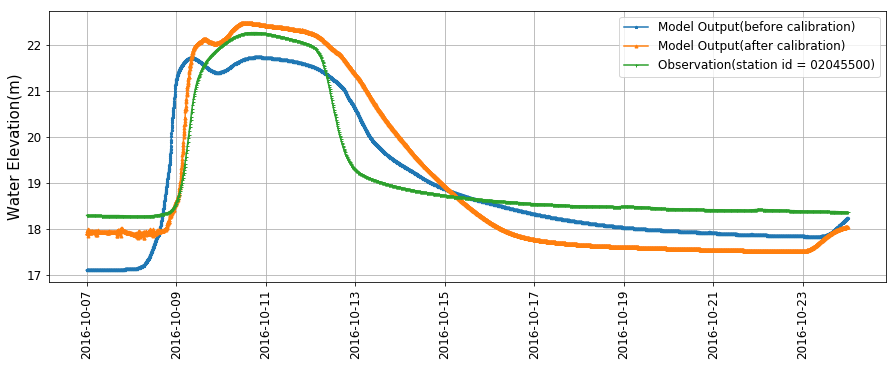

In [12]:
comp_obs_model(obs_path, station_id, start_time, end_time, model_output_bf_cal_path, model_output_af_cal_path)

In [13]:
obs_path = "./Data adjusted to the vertical datum/"
station_id = "02047370"
start_time = '2016-10-07 00:00'
end_time = '2016-10-24 00:00'
model_output_af_cal_path = "VU_30m_HPC_GPU_Nicole_2016_gauges_035_baseflow_PO.csv"
model_output_bf_cal_path = "VU_30m_HPC_GPU_Nicole_2016_010_PO.csv"

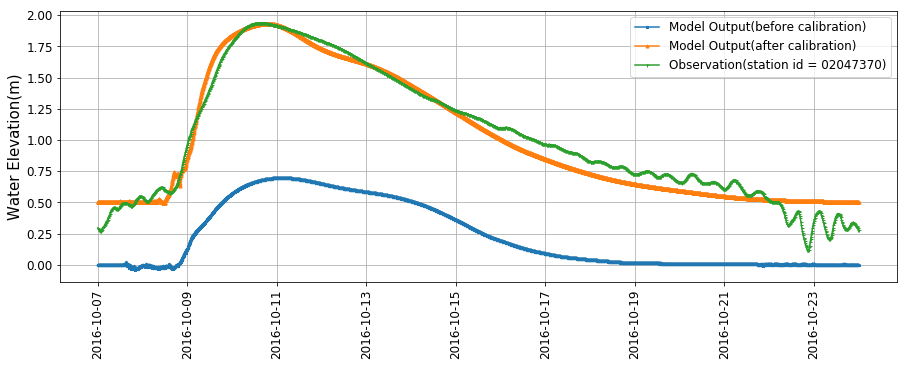

In [14]:
comp_obs_model(obs_path, station_id, start_time, end_time, model_output_bf_cal_path, model_output_af_cal_path)